In [1]:
#importing in all the libraries i need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, DecisionTreeClassifier
from sklearn import tree

In [2]:
#reading in my data
elif_posts = pd.read_csv('../data/elif_posts.csv')
ootl_posts = pd.read_csv('../data/ootl_posts.csv')

In [3]:
#tonkenizing my data and saving it to a new column in each data frame
tokenizer = RegexpTokenizer(r'\w+')

elif_posts['token_list'] = [tokenizer.tokenize(elif_posts.selftext[i].lower()) for i in range(len(elif_posts))]
ootl_posts['token_list'] = [tokenizer.tokenize(ootl_posts.selftext[i].lower()) for i in range(len(ootl_posts))]

In [4]:
#instantiating lemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
#lemmatizing the tokenized data columns from earlier
elif_posts['token_list'] = [[lemmatizer.lemmatize(i) for i in elif_posts.token_list[j]] for j in range(len(elif_posts))]
ootl_posts['token_list'] = [[lemmatizer.lemmatize(i) for i in ootl_posts.token_list[j]] for j in range(len(ootl_posts))]

In [6]:
#removing stop words from my tokenized data 
elif_posts['token_list'] = [[token for token in elif_posts.token_list[i] if token not in stopwords.words('english')] for i in range(len(elif_posts))]
ootl_posts['token_list'] = [[token for token in ootl_posts.token_list[i] if token not in stopwords.words('english')] for i in range(len(ootl_posts))]

In [7]:
elif_posts['token_list'] = [' '.join(i) for i in elif_posts['token_list']]
ootl_posts['token_list'] = [' '.join(i) for i in ootl_posts['token_list']]

In [8]:
elif_count = elif_posts['selftext']
ootl_count = ootl_posts['selftext']
cvec = CountVectorizer()
cvec.fit(elif_count)
cvec.fit(ootl_count)

CountVectorizer()

In [9]:
elif_count = cvec.transform(elif_count)
ootl_count = cvec.transform(ootl_count)

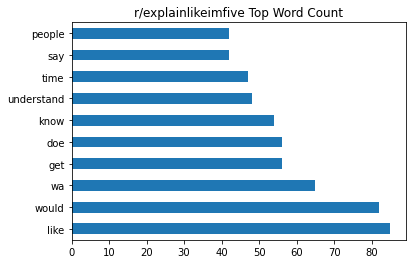

In [10]:
elif_count_df = pd.DataFrame(elif_count.todense(), columns=cvec.get_feature_names())
elif_count_df.sum().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'r/explainlikeimfive Top Word Count');

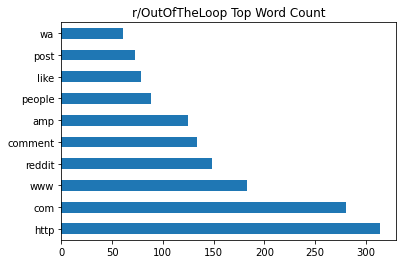

In [11]:
ootl_count_df = pd.DataFrame(ootl_count.todense(), columns=cvec.get_feature_names())
ootl_count_df.sum().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'r/OutOfTheLoop Top Word Count');

In [12]:
#making a new data frame with both sets of posts
both_posts = pd.concat([elif_posts, ootl_posts], ignore_index=True)

In [13]:
#taking a peek to make sure nothing went wrong
both_posts

,subreddit,title,selftext,created_utc,token_list
0,explainlikeimfive,ELI5: What is the real meaning behind extremel...,place 22f feel colder place negative temperatu...,1641354008,place 22f feel colder place negative temperatu...
1,explainlikeimfive,ELI5: Why do some folks have sagged pants and ...,never understood someone ha pant sagging under...,1641353416,never understood someone ha pant sagging under...
2,explainlikeimfive,ELI5: If a watt is a measurement of work per s...,electricity force least think measured unit in...,1641352620,electricity force least think measured unit in...
3,explainlikeimfive,ELI5 Why are there no airplane routes that fly...,faster get say south america argentina lived s...,1641351940,faster get say south america argentina lived s...
4,explainlikeimfive,ELI5: How do timed events in online videogames...,instance playing game receives zero update pat...,1641351647,instance playing game receives zero update pat...
...,...,...,...,...,...
494,OutOfTheLoop,What's going on with Sharon's pie and the no b...,keep seeing tiktok sharon pie black burned pie...,1639885500,keep seeing tiktok sharon pie black burned pie...
495,OutOfTheLoop,What's the deal with r/LoveForLandlords?,http www reddit com r loveforlandlords best gu...,1639877146,http www reddit com r loveforlandlords best gu...
496,OutOfTheLoop,What's up with France being associated with po...,http www deccanchronicle com 150531 lifestyle ...,1639869315,http www deccanchronicle com 150531 lifestyle ...
497,OutOfTheLoop,What's going on with Kyrie Irving entering Cov...,noticed r nba declaring happening upvoted post...,1639866774,noticed r nba declaring happening upvoted post...


In [14]:
#mapping the subreddits for modeling 
both_posts['subreddit'] = both_posts['subreddit'].map({'explainlikeimfive':1, 'OutOfTheLoop':0})

## Grid Search Over CountVectorizer BernoulliNB Model

In [15]:
#setting X and y variables for modeling
X = both_posts['token_list']
y = both_posts['subreddit']

In [16]:
#checking for baseline subreddit ratios
y.value_counts(normalize=True)

1    0.573146
0    0.426854
Name: subreddit, dtype: float64

In [17]:
#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
#instantiating count vectorizer
cvec = CountVectorizer()

In [19]:
#fitting X_train
cvec.fit(X_train)

CountVectorizer()

In [20]:
#transforming X_train
X_train = cvec.transform(X_train)

In [21]:
cvec.get_feature_names()[1000:1010]

['cryptocurrency',
 'cte',
 'ctrl',
 'cuba',
 'cuban',
 'cube',
 'cult',
 'cultural',
 'culture',
 'cumrun']

In [22]:
X_test = cvec.transform(X_test)

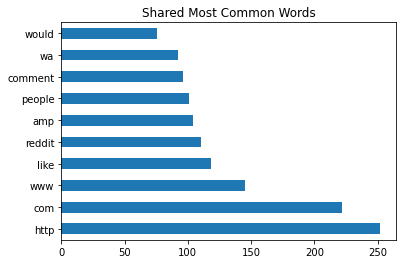

In [23]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Shared Most Common Words');

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [25]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [26]:
pipe_param = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95], 
    'cvec__ngram_range': [(1, 1), (1,2)]
}

In [27]:
gs = GridSearchCV(pipe,
                 param_grid=pipe_param,
                 cv=5)

In [28]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [29]:
gs.best_score_

0.9192220714608774

In [30]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9550898203592815, 0.9393939393939394)

In [31]:
preds = gs.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

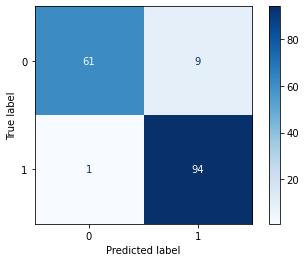

In [32]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [33]:
spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8714285714285714


## Grid Search Over TF-IDF Vectorizer and Multinomial Naive Bayes

In [34]:
tvec = TfidfVectorizer()

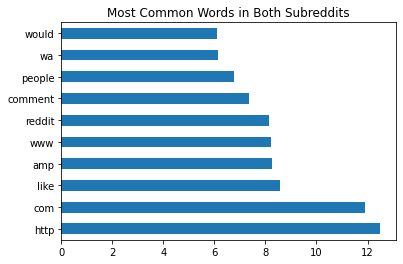

In [35]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Most Common Words in Both Subreddits');

In [36]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [37]:
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [38]:
gs_tvec = GridSearchCV(pipe_tvec, # what object are we optimizing?
                        param_grid = pipe_tvec_params, # what parameters values are we searching?
                        cv=5) # 5-fold cross-validation.

In [39]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [40]:
gs_tvec.score(X_train, y_train), gs_tvec.score(X_test, y_test)

(0.9880239520958084, 0.9515151515151515)

In [41]:
# Get predictions
preds_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.9857142857142858


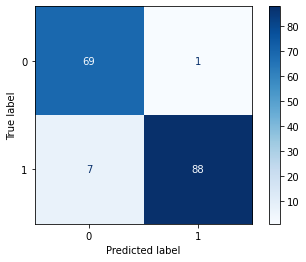

In [42]:
# visualize this

plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

In [43]:
#storing data efficiently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

cvec = CountVectorizer()

X_train = cvec.fit_transform(X_train)

print(type(X_train))
print(X_train[0])

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1260)	1
  (0, 2534)	1
  (0, 1677)	1
  (0, 2714)	1
  (0, 796)	1
  (0, 3380)	1
  (0, 805)	1
  (0, 2847)	1
  (0, 206)	1
  (0, 2950)	1
  (0, 1252)	1
  (0, 352)	1
  (0, 1907)	1
  (0, 1600)	1
  (0, 2511)	1
  (0, 601)	1


## Random Forest

In [44]:
X = both_posts['selftext']
y = both_posts['subreddit']

In [45]:
tvec = TfidfVectorizer()
tvec.fit(X)

TfidfVectorizer()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train_transformed = tvec.transform(X_train)
X_test_transformed = tvec.transform(X_test)

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [49]:
rf.score(X_train_transformed, y_train), rf.score(X_test_transformed, y_test)

(1.0, 0.968)

In [50]:
rf_params = {
    'n_estimators' : [100, 150, 200],
    'max_depth' : [None, 1 , 2, 3, 4, 5]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [51]:
gs.score(X_train_transformed, y_train), gs.score(X_test_transformed, y_test)

(1.0, 0.968)